In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force TensorFlow to use CPU only

# Now import TensorFlow and the rest of the code remains the same
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:

# Define the augmentation function
def augment(image, label):
    # Flip the image horizontally
    image = tf.image.flip_left_right(image)

    # Adjust the brightness of the image
    image = tf.image.adjust_brightness(image, delta=0.1)

    # Apply Gaussian blur using a more standard method
    image = tf.image.resize(image, [258, 258])
    image = tf.image.central_crop(image, 256/258)

    # Add border to the image
    image = tf.image.resize_with_crop_or_pad(image, 276, 276)  # Add border
    image = tf.image.resize(image, [256, 256])  # Resize back to 256x256

    return image, label

# Create training dataset with augmentation
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Apply augmentation using map function
train_ds_augmented = train_ds.map(augment)

# Create validation dataset without augmentation
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Optional: Prefetch data for better performance
train_ds_augmented = train_ds_augmented.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=tf.data.AUTOTUNE)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=4,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_17 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 102ms/step - loss: 0.8171 - accuracy: 0.6238 - val_loss: 0.5904 - val_accuracy: 0.6772
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5310 - accuracy: 0.7309 - val_loss: 0.6229 - val_accuracy: 0.7060
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4425 - accuracy: 0.7889 - val_loss: 0.5355 - val_accuracy: 0.7304
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3756 - accuracy: 0.8267 - val_loss: 0.4267 - val_accuracy: 0.8000
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3109 - accuracy: 0.8564 - val_loss: 0.4616 - val_accuracy: 0.8022
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2541 - accuracy: 0.8856 - val_loss: 0.6959 - val_accuracy: 0.7584
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1955 - accuracy: 0.9136 - val_loss: 0.5214 - val_ac

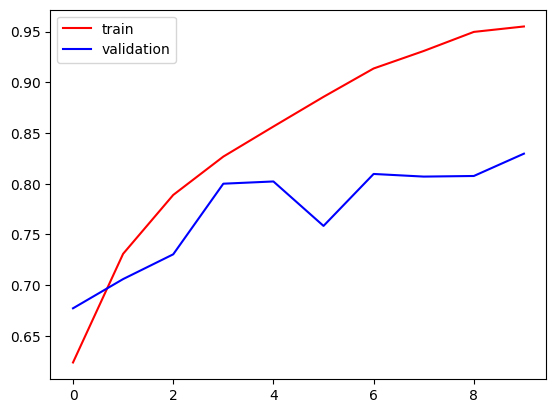

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

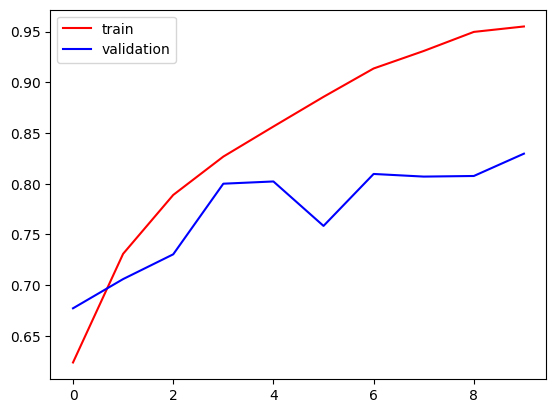

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

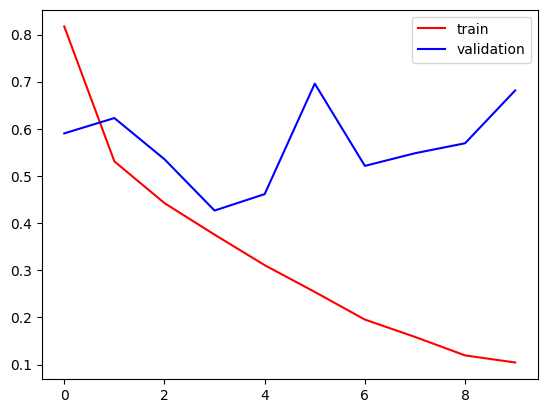

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

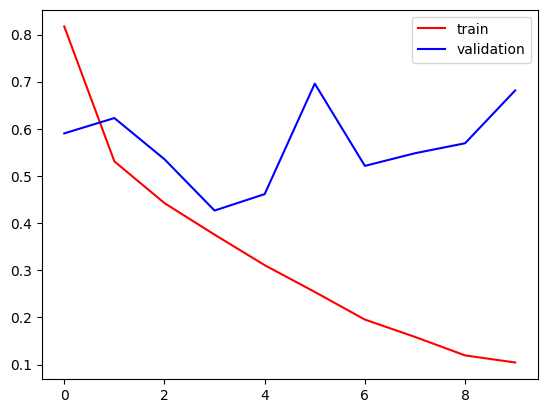

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

5/5 [==============================] - 1s 253ms/step


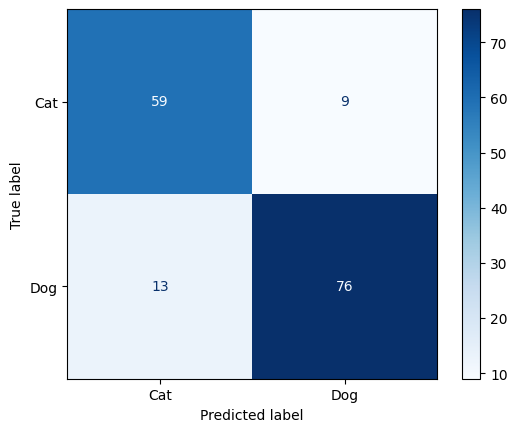

              precision    recall  f1-score   support

         Cat       0.82      0.87      0.84        68
         Dog       0.89      0.85      0.87        89

    accuracy                           0.86       157
   macro avg       0.86      0.86      0.86       157
weighted avg       0.86      0.86      0.86       157



TypeError: Image data of dtype object cannot be converted to float

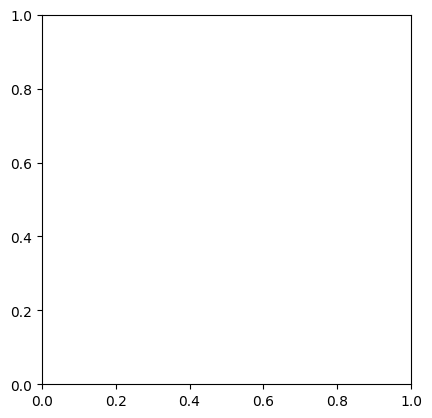

In [ ]:
# Performance metrics
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate the model on the validation set
val_images, val_labels = next(iter(validation_ds.unbatch().batch(len(validation_ds))))
val_predictions = model.predict(val_images)
val_predictions = np.where(val_predictions > 0.5, 1, 0).flatten()

# Confusion matrix
cm = confusion_matrix(val_labels, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print(classification_report(val_labels, val_predictions, target_names=['Cat', 'Dog']))

# Load and predict on a test image
# import cv2

# test_img = cv2.imread('/content/cat.jpeg') # class label 0
# plt.imshow(test_img)
# plt.show()

# test_img = cv2.resize(test_img, (256, 256))
# test_input = test_img.reshape((1, 256, 256, 3))

# prediction = model.predict(test_input)
# print("Prediction:", "Dog" if prediction > 0.5 else "Cat")

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

TypeError: Image data of dtype object cannot be converted to float

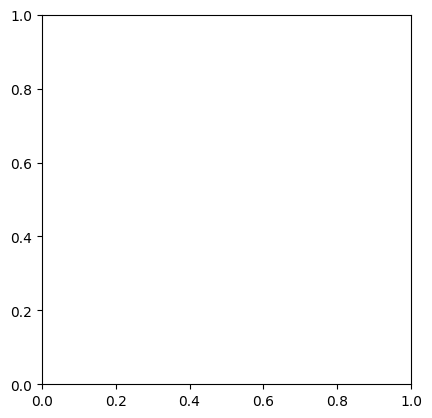

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)